In [1]:
from src.main import Trainer, Tester, Board, make_datasets
from src.networks import AlexNet, ResNet18, ResNet34, Inceptionv4
from numpy import array
from torch.utils.data import DataLoader
from torch.nn import MSELoss, Module
from torch.optim import Adam
import torch

In [2]:
device = (
    "cuda"  # nvidia GPU
    if torch.cuda.is_available()
    else "mps"  # mac GPU
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


# Prepare dataset

In [3]:
batch = 2

train_dataset, test_dataset = make_datasets(
        "data/train/train.csv",
        "data/train",
        0.8,
        device
    )
train_dataloader = DataLoader(train_dataset, batch_size=batch, shuffle=True,
                              pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch,
                             pin_memory=True)

/Users/danila/Documents/Python Projects/Competition/src/main/_data.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[["distance", "height"]] = self.numerical_normalize(
/Users/danila/Documents/Python Projects/Competition/src/main/_data.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[["distance", "height"]] = self.numerical_normalize(


# Select NN architecture

## Loss

In [4]:
loss = MSELoss()
optimizer_cls = Adam
lr = 2e-3
epochs = 10

## Train, Test loops

In [5]:
def evaluate_model(model: Module,
                   train_dataloader: DataLoader,
                   test_dataloader: DataLoader,
                   lr: float,
                   epochs: int,
                   optim_cls) -> None:
    optim = optim_cls(model.parameters(), lr=lr)

    train_loop = Trainer(model, MSELoss(), optim)
    test_loop = Tester(model, MSELoss())
    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        train_losses.append(train_loop.run(train_dataloader))

        test_losses.append(test_loop.run(test_dataloader))
        print(f"Epoch {epoch + 1} finished!", end="\n\n")

    board = Board(array(train_losses),
                  array(test_losses),
                  model)
    board.stats()
    

evaluate_params = {
    "train_dataloader": train_dataloader,
    "test_dataloader": test_dataloader,
    "lr": lr,
    "epochs": epochs,
    "optim_cls": Adam
}

## AlexNet

Train loop, batch 1/8, loss: 1.0565153360366821
Train loop, batch 2/8, loss: 24309944.0
Train loop, batch 3/8, loss: 9.384087562561035
Train loop, batch 4/8, loss: 1.0870779752731323
Train loop, batch 5/8, loss: 0.7681536078453064
Train loop, batch 6/8, loss: 0.6975544691085815
Train loop, batch 7/8, loss: 1.0006238222122192
Train loop, batch 8/8, loss: 0.23115402460098267
Train loop finished! Time: 3.071 s.
Test loop, batch 1/2, loss: 2.8305201530456543
Test loop, batch 2/2, loss: 0.030201096087694168
Test loop finished! Time: 0.098 s.
Epoch 1 finished!

Train loop, batch 1/8, loss: 1.6426934003829956
Train loop, batch 2/8, loss: 0.44314518570899963
Train loop, batch 3/8, loss: 39.71278381347656
Train loop, batch 4/8, loss: 1.599782109260559
Train loop, batch 5/8, loss: 0.1819777488708496
Train loop, batch 6/8, loss: 0.020939432084560394
Train loop, batch 7/8, loss: 0.44637972116470337
Train loop, batch 8/8, loss: 0.11006339639425278
Train loop finished! Time: 2.354 s.
Test loop, batc

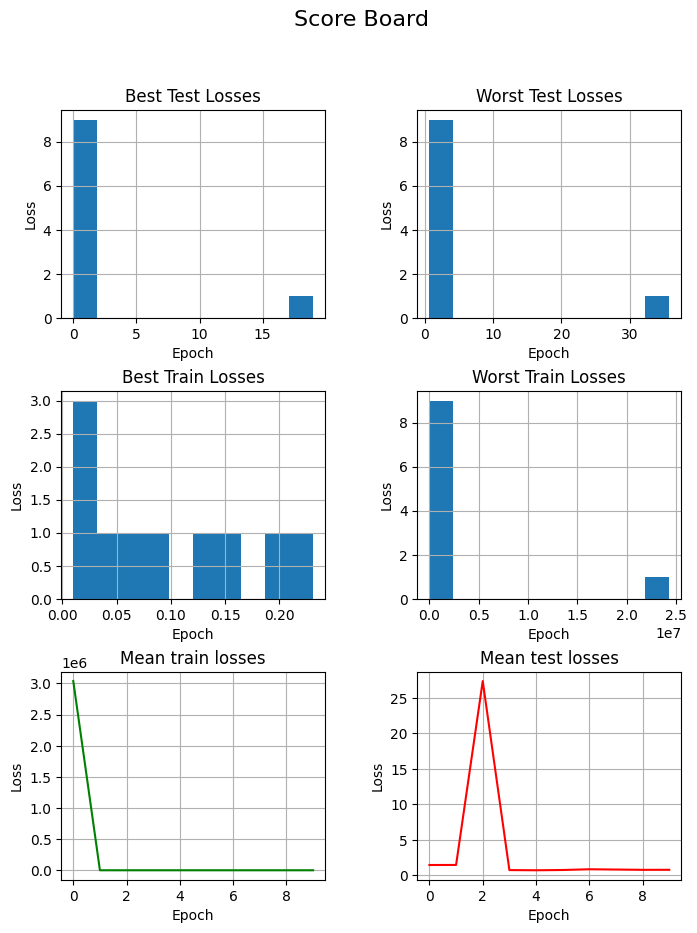

In [6]:
from src.networks import AlexNet


alexnet = AlexNet().to(device)
evaluate_model(alexnet,
               **evaluate_params)

## ResNet34

Train loop, batch 1/8, loss: 1.2829030752182007
Train loop, batch 2/8, loss: 7.76641845703125
Train loop, batch 3/8, loss: 4.361322402954102
Train loop, batch 4/8, loss: 0.15445777773857117
Train loop, batch 5/8, loss: 1.249282956123352
Train loop, batch 6/8, loss: 0.10926073044538498
Train loop, batch 7/8, loss: 0.6920443773269653
Train loop, batch 8/8, loss: 1.2148231267929077
Train loop finished! Time: 2.426 s.
Test loop, batch 1/2, loss: 353105444864.0
Test loop, batch 2/2, loss: 351658475520.0
Test loop finished! Time: 0.131 s.
Epoch 1 finished!

Train loop, batch 1/8, loss: 2.0173587799072266
Train loop, batch 2/8, loss: 0.36792802810668945
Train loop, batch 3/8, loss: 2.7018799781799316
Train loop, batch 4/8, loss: 1.8763549327850342
Train loop, batch 5/8, loss: 1.8453285694122314
Train loop, batch 6/8, loss: 1.9121999740600586
Train loop, batch 7/8, loss: 0.29857438802719116
Train loop, batch 8/8, loss: 0.31082165241241455
Train loop finished! Time: 1.731 s.
Test loop, batch 1/

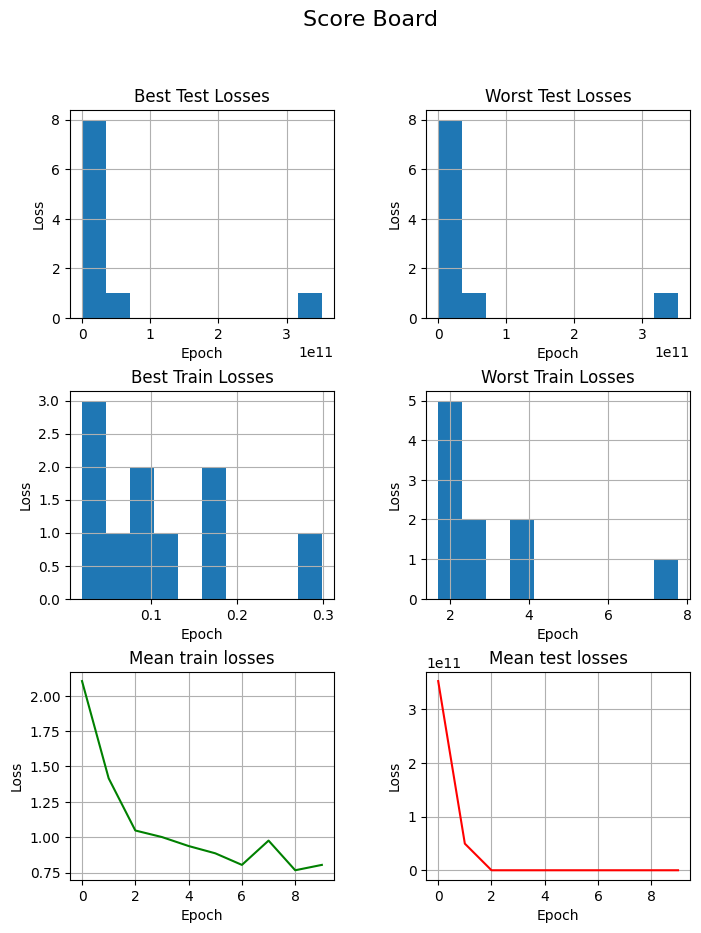

In [7]:
from src.networks import ResNet34


resnet34 = ResNet34().to(device)
evaluate_model(resnet34,
               **evaluate_params)

## ResNet18

Train loop, batch 1/8, loss: 0.6136139631271362
Train loop, batch 2/8, loss: 14.585190773010254
Train loop, batch 3/8, loss: 5.463928699493408
Train loop, batch 4/8, loss: 1.6300824880599976
Train loop, batch 5/8, loss: 2.2081830501556396
Train loop, batch 6/8, loss: 0.28009843826293945
Train loop, batch 7/8, loss: 1.256127953529358
Train loop, batch 8/8, loss: 0.9813351631164551
Train loop finished! Time: 1.069 s.
Test loop, batch 1/2, loss: 286313.5625
Test loop, batch 2/2, loss: 1878435.875
Test loop finished! Time: 0.107 s.
Epoch 1 finished!

Train loop, batch 1/8, loss: 0.7081558704376221
Train loop, batch 2/8, loss: 0.507163405418396
Train loop, batch 3/8, loss: 0.1802312433719635
Train loop, batch 4/8, loss: 0.641463577747345
Train loop, batch 5/8, loss: 3.7770023345947266
Train loop, batch 6/8, loss: 0.6877087950706482
Train loop, batch 7/8, loss: 0.40774285793304443
Train loop, batch 8/8, loss: 0.2693328261375427
Train loop finished! Time: 1.073 s.
Test loop, batch 1/2, loss: 

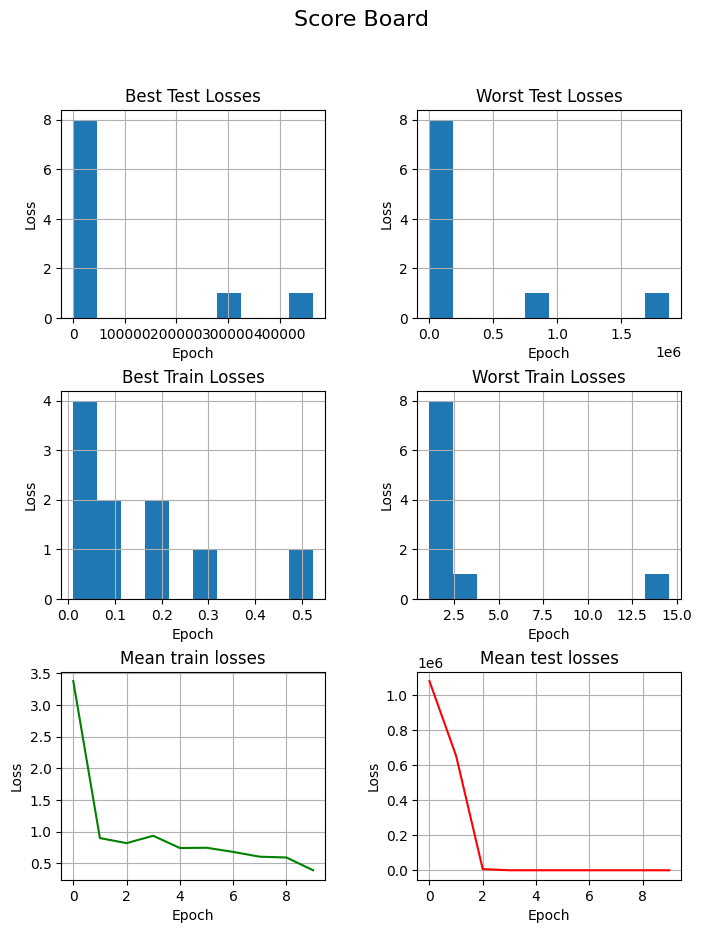

In [8]:
from src.networks import ResNet18


resnet18 = ResNet18().to(device)
evaluate_model(resnet18,
               **evaluate_params)

## InceptionV4

Train loop, batch 1/8, loss: 0.16719773411750793
Train loop, batch 2/8, loss: 13178.5
Train loop, batch 3/8, loss: 911.779052734375
Train loop, batch 4/8, loss: 1647.304443359375
Train loop, batch 5/8, loss: 2632.0390625
Train loop, batch 6/8, loss: 1478.7099609375
Train loop, batch 7/8, loss: 393.96429443359375
Train loop, batch 8/8, loss: 184.161865234375
Train loop finished! Time: 12.641 s.
Test loop, batch 1/2, loss: 3230.585693359375
Test loop, batch 2/2, loss: 3430.2197265625
Test loop finished! Time: 0.482 s.
Epoch 1 finished!

Train loop, batch 1/8, loss: 765.438232421875
Train loop, batch 2/8, loss: 3.5322561264038086
Train loop, batch 3/8, loss: 997.4524536132812
Train loop, batch 4/8, loss: 64.1852798461914
Train loop, batch 5/8, loss: 32.690574645996094
Train loop, batch 6/8, loss: 159.12559509277344
Train loop, batch 7/8, loss: 3824.416259765625
Train loop, batch 8/8, loss: 44.960792541503906
Train loop finished! Time: 6.494 s.
Test loop, batch 1/2, loss: 14622111744.0
Tes

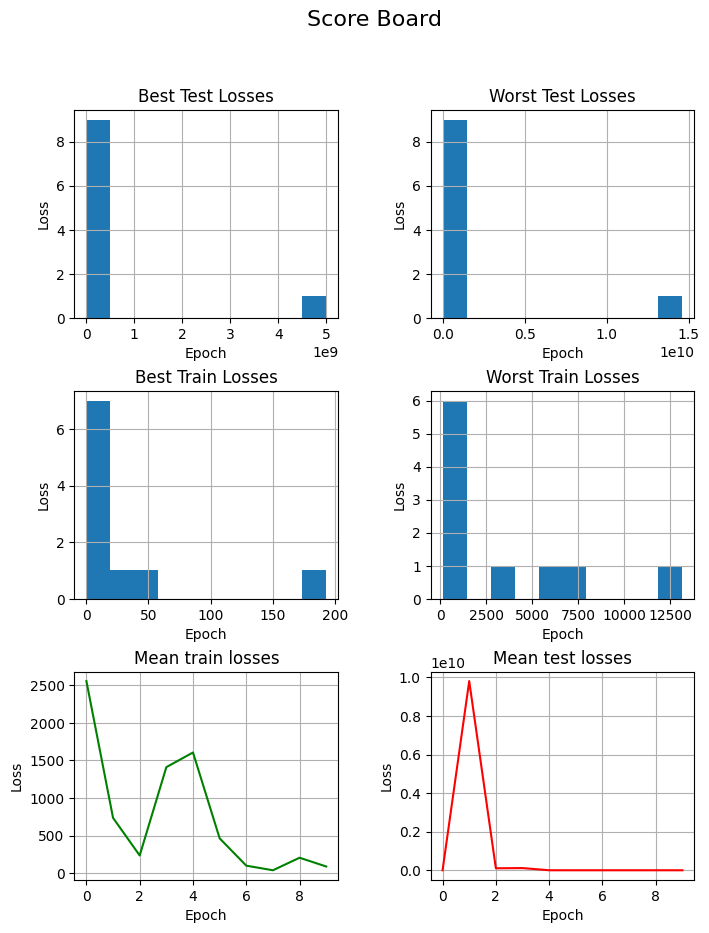

In [9]:
from src.networks import Inceptionv4


inceptionv4 = Inceptionv4().to(device)
evaluate_model(inceptionv4,
               **evaluate_params)